---

<center> <h1> <span style='color:#292D78'> Exploratory Data Analysis - EDA </span> </h1> </center>

<center> <h2> <span style='color:#DF7F00'> Project: Energy Consumption Analysis </span> </h2> </center>

---

In this [Jupyter Notebook](https://jupyter.org/install) we will analyze the [energy consumption of different sources](https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather) from Spain.

# Energy Consumption Analysis

Using a [dataset](https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather) of energy consumption in Spain, we will use statistic techniques to extract insightful information with data manipulation and visualization.

## Context

In a [paper released early 2019](https://arxiv.org/abs/1906.05433), forecasting in energy markets is identified as one of the highest leverage contribution areas of Machine/Deep Learning toward transitioning to a renewable based electrical infrastructure.

## Content

This dataset contains 4 years of electrical consumption, generation, pricing, and weather data for Spain. Consumption and generation data was retrieved from ENTSOE, a public portal for Transmission Service Operator (TSO) data. Settlement prices were obtained from the Spanish TSO Red Electric España. Weather data was purchased as part of a personal project from the Open Weather API for the 5 largest cities in Spain and made public here.

## Acknowledgements

This data is publicly available via ENTSOE and REE and may be found in the links above.

## The Data

This is a dataset containing two files, `energy_dataset.csv` and the `weather_features.csv`.

### Energy Dataset

The energy dataset contains 29 columns:

* ``time``: datetime index localized to CET
* ``generation biomass``: generated biomass energy in MW
* ``generation fossil brown coal/lignite``: generated coal energy in MW
* ``generation fossil coal-derived gas``: generated coal-derived gas energy in MW
* ``generation fossil gas``: generated natural gas energy in MW
* ``generation fossil hard coal``: generated hard coal energy in MW
* ``generation fossil oil``: generated conventional oil energy in MW
* ``generation fossil oil shale``: generated unconventional oil energy in MW
* ``generation fossil peat``: generated peat energy in MW
* ``generation geothermal``: generated geothermal energy in MW
* ``generation hydro pumped storage aggregated``: generated hydro pumped storage aggregated energy in MW
* ``generation hydro pumped storage consumption``: generated hydro pumped storage consumption energy in MW
* ``generation hydro run-of-river and poundage``: generated hydro run-of-river and poundage energy in MW
* ``generation hydro water reservoir``: generated hydro water reservoir energy in MW
* ``generation marine``: generated marine (wave) energy in MW
* ``generation nuclear``: generated nuclear energy in MW
* ``generation other``: other non-renewable sources of energy in MW
* ``generation other renewable``: other renewable sources of energy in MW
* ``generation solar``: generated solar energy in MW
* ``generation waste``: generated waste energy in MW
* ``generation wind offshore``: generated wind (offshore) energy in MW
* ``generation wind onshore``: generated wind (onshore) energy in MW
* ``forecast solar day ahead``: forecasted solar energy generation
* ``forecast wind offshore eday ahead``: forecasted offshore wind generation
* ``forecast wind onshore day ahead``: forecasted onshore wind generation
* ``total load forecast``: forecasted electrical demand
* ``total load actual``: actual electrical demand
* ``price day ahead``: forecasted price EUR/MWh
* ``price actual``: price in EUR/MWh

### Weather Features

The weather datset contains 17 columns:

* ``dt_iso``: datetime index localized to CET
* ``city_name``: name of city
* ``temp``: temperature in k (Kelvin)
* ``temp_min``: minimum in k
* ``temp_max``: maximum in k
* ``pressure``: pressure in hPa
* ``humidity``: humidity in %
* ``wind_speed``: wind speed in m/s
* ``wind_deg``: wind direction
* ``rain_1h``: rain in last hour in mm
* ``rain_3h``: rain last 3 hours in mm
* ``snow_3h``: show last 3 hours in mm
* ``clouds_all``: cloud cover in %
* ``weather_id``: Code used to describe weather
* ``weather_main``: Short description of current weather
* ``weather_description``: Long description of current weather
* ``weather_icon``: Weather icon code for website

# Data Analysis

We will simplify the data for the analysis, by combining columns and grouping by year and month.

## Loading the data

In [1]:
# To supress warnings and deprecated messages
import warnings

warnings.filterwarnings("ignore")

# Core
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
energy = pd.read_csv("energy_dataset.csv")
energy

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


In [3]:
weather = pd.read_csv("weather_features.csv")
weather

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,2018-12-31 20:00:00+01:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,2018-12-31 21:00:00+01:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,2018-12-31 22:00:00+01:00,Seville,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n


## Checking data types

Using the method `info`:

### Energy data

In [4]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

Except for the column *time*, which is of the object type, all the columns are of the numeric type. 

We will fix the *time* column by converting it to datetime.

In [5]:
energy['time'] = pd.to_datetime(energy['time'], format='%Y-%m-%d', utc=True)
print(energy.info())
energy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35045 non-null  float64            
 2   generation fossil brown coal/lignite         35046 non-null  float64            
 3   generation fossil coal-derived gas           35046 non-null  float64            
 4   generation fossil gas                        35046 non-null  float64            
 5   generation fossil hard coal                  35046 non-null  float64            
 6   generation fossil oil                        35045 non-null  float64            
 7   generation fossil oil shale                  35046 non-null  float64            
 8   generation fossil peat    

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


### Weather Features

In [6]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

Most of the columns are numeric. *dt_iso*, *city_name*, *weather_main*, *weather_description*, and *weather_icon* are of the object type. We will convert *dt_iso* to the datetime type and rename it as *time*:

In [7]:
weather['dt_iso'] = pd.to_datetime(weather['dt_iso'], format='%Y-%m-%d', utc=True)
weather.rename(columns={'dt_iso':'time'}, inplace=True)
print(weather.info())
weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   time                 178396 non-null  datetime64[ns, UTC]
 1   city_name            178396 non-null  object             
 2   temp                 178396 non-null  float64            
 3   temp_min             178396 non-null  float64            
 4   temp_max             178396 non-null  float64            
 5   pressure             178396 non-null  int64              
 6   humidity             178396 non-null  int64              
 7   wind_speed           178396 non-null  int64              
 8   wind_deg             178396 non-null  int64              
 9   rain_1h              178396 non-null  float64            
 10  rain_3h              178396 non-null  float64            
 11  snow_3h              178396 non-null  float64            
 12  cl

,time,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2014-12-31 23:00:00+00:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 00:00:00+00:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 01:00:00+00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 02:00:00+00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 03:00:00+00:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [8]:
print('Date range for Energy data:')
print(energy['time'].min())
print(energy['time'].max())


Date range for Energy data:
2014-12-31 23:00:00+00:00
2018-12-31 22:00:00+00:00


In [9]:
print('Date range for Weather data:')
print(weather['time'].min())
print(weather['time'].max())


Date range for Weather data:
2014-12-31 23:00:00+00:00
2018-12-31 22:00:00+00:00


Both data have the same date range.

### Weather

Before extracting year, month, and day from the weather dataframe, we will understand it better. How many different cities there are in the data?

In [10]:
print(weather['city_name'].unique())
print('Number of cities: ', weather['city_name'].nunique())


['Valencia' 'Madrid' 'Bilbao' ' Barcelona' 'Seville']
Number of cities:  5


There are 5 different cities in the data (Valencia, Madrid, Bilbao, Barcelona, Seville) meaning that the weather information are from these locations. However, the generation data (energy) contains the total energy production in Spain.

To match the structure of the files we have, we can average the weather columns (the numeric ones) over the dates and assume that they are the mean weather of Spain for that specific time.

In [11]:
print(energy.shape[0])
print(weather.shape[0]/5)

35064
35679.2


Apparently, at least one of the cities may have more dates than the production data.

### Check, for all cities, how many rows of data they have

In [12]:
weather['city_name'][weather['city_name']==' Barcelona'] = 'Barcelona'
weather.groupby(weather['city_name'])['city_name'].count()

city_name
Barcelona    35476
Bilbao       35951
Madrid       36267
Seville      35557
Valencia     35145
Name: city_name, dtype: int64

Apparently, all the cities have at least slight more data than the energy production data. We need further analysis to understand the reason.

### Grouping the Weather Data

Now, the next step is to average the numeric weather info for each date. So, we just need to `groupby` the data by *time* and compute the mean.

In [13]:
new_weather = weather.groupby(weather['time'], as_index=False).mean()
new_weather.head()

,time,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
0,2014-12-31 23:00:00+00:00,272.491463,272.491463,272.491463,1016.4,82.4,2.0,135.2,0.0,0.0,0.0,0.0,800.0
1,2015-01-01 00:00:00+00:00,272.512700,272.512700,272.512700,1016.2,82.4,2.0,135.8,0.0,0.0,0.0,0.0,800.0
2,2015-01-01 01:00:00+00:00,272.099137,272.099137,272.099137,1016.8,82.0,2.4,119.0,0.0,0.0,0.0,0.0,800.0
3,2015-01-01 02:00:00+00:00,272.089469,272.089469,272.089469,1016.6,82.0,2.4,119.2,0.0,0.0,0.0,0.0,800.0
4,2015-01-01 03:00:00+00:00,272.145900,272.145900,272.145900,1016.6,82.0,2.4,118.4,0.0,0.0,0.0,0.0,800.0


In [14]:
print(new_weather.shape[0])
print(energy.shape[0])

35064
35064


Now the number of rows is the same for both data files.

## Sum columns

In this part, to make the analysis easier, let's sum together, in the energy dataframe, the production of fossils derivative in one column, renewable in others, and so on.

First, let's select all the column names that contain the word *fossil*. To extract the columns names from a dataframe:

```python
df.columns

or

list(df)
```

Let's use the second option, as we are sure that they will be extracted to a list.

In [15]:
cols = list(energy)
cols

['time',
 'generation biomass',
 'generation fossil brown coal/lignite',
 'generation fossil coal-derived gas',
 'generation fossil gas',
 'generation fossil hard coal',
 'generation fossil oil',
 'generation fossil oil shale',
 'generation fossil peat',
 'generation geothermal',
 'generation hydro pumped storage aggregated',
 'generation hydro pumped storage consumption',
 'generation hydro run-of-river and poundage',
 'generation hydro water reservoir',
 'generation marine',
 'generation nuclear',
 'generation other',
 'generation other renewable',
 'generation solar',
 'generation waste',
 'generation wind offshore',
 'generation wind onshore',
 'forecast solar day ahead',
 'forecast wind offshore eday ahead',
 'forecast wind onshore day ahead',
 'total load forecast',
 'total load actual',
 'price day ahead',
 'price actual']

First, let's only select the elements of the list that contain the word *generation* using conditions in a *list comprehension*.

In [16]:
cols_gen = [col for col in cols if 'generation' in col]
cols_gen

['generation biomass',
 'generation fossil brown coal/lignite',
 'generation fossil coal-derived gas',
 'generation fossil gas',
 'generation fossil hard coal',
 'generation fossil oil',
 'generation fossil oil shale',
 'generation fossil peat',
 'generation geothermal',
 'generation hydro pumped storage aggregated',
 'generation hydro pumped storage consumption',
 'generation hydro run-of-river and poundage',
 'generation hydro water reservoir',
 'generation marine',
 'generation nuclear',
 'generation other',
 'generation other renewable',
 'generation solar',
 'generation waste',
 'generation wind offshore',
 'generation wind onshore']

Now we can separate the elements that contain the word *fossil* and the ones that don't (which are the renewable energy).

In [17]:
cols_fossil = [col for col in cols_gen if 'fossil' in col]
cols_fossil


['generation fossil brown coal/lignite',
 'generation fossil coal-derived gas',
 'generation fossil gas',
 'generation fossil hard coal',
 'generation fossil oil',
 'generation fossil oil shale',
 'generation fossil peat']

In [18]:
cols_renew = [col for col in cols_gen if 'fossil' not in col]
cols_renew

['generation biomass',
 'generation geothermal',
 'generation hydro pumped storage aggregated',
 'generation hydro pumped storage consumption',
 'generation hydro run-of-river and poundage',
 'generation hydro water reservoir',
 'generation marine',
 'generation nuclear',
 'generation other',
 'generation other renewable',
 'generation solar',
 'generation waste',
 'generation wind offshore',
 'generation wind onshore']

- Now we can sum these columns using the pandas method `sum` with the parameter `axis = 1`.
- Create a new column for fossil generation and another one for renewable generation.
- Finally drop the previous columns.

In [19]:
energy['fossil_generation'] = energy[cols_fossil].sum(axis=1)
energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,fossil_generation
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,10156.0
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92,10437.0
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48,9918.0
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32,8859.0
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04,8313.0


In [20]:
energy['renewable_generation'] = energy[cols_renew].sum(axis=1)
energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,fossil_generation,renewable_generation
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,10156.0,18095.0
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92,10437.0,17381.0
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48,9918.0,16878.0
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32,8859.0,16364.0
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04,8313.0,16307.0


Let's also create a column with the total energy generation.

In [21]:
energy['total_generation'] = energy['fossil_generation'] + \
    energy['renewable_generation']
energy.head()


,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,fossil_generation,renewable_generation,total_generation
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,10156.0,18095.0,28251.0
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92,10437.0,17381.0,27818.0
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48,9918.0,16878.0,26796.0
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32,8859.0,16364.0,25223.0
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04,8313.0,16307.0,24620.0


Now that we have the summarized columns, we can drop the *generation* ones:

In [22]:
energy.drop(columns = cols_gen, inplace=True)
energy.head()

,time,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,fossil_generation,renewable_generation,total_generation
0,2014-12-31 23:00:00+00:00,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,10156.0,18095.0,28251.0
1,2015-01-01 00:00:00+00:00,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92,10437.0,17381.0,27818.0
2,2015-01-01 01:00:00+00:00,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48,9918.0,16878.0,26796.0
3,2015-01-01 02:00:00+00:00,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32,8859.0,16364.0,25223.0
4,2015-01-01 03:00:00+00:00,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04,8313.0,16307.0,24620.0


Let's also drop the *forecast* columns as we are not doing any modeling to compare.

In [23]:
cols_forecast = [col for col in list(energy) if 'forecast' in col]
cols_forecast

['forecast solar day ahead',
 'forecast wind offshore eday ahead',
 'forecast wind onshore day ahead',
 'total load forecast']

In [24]:
energy.drop(columns=cols_forecast, inplace=True)
energy.head()

,time,total load actual,price day ahead,price actual,fossil_generation,renewable_generation,total_generation
0,2014-12-31 23:00:00+00:00,25385.0,50.10,65.41,10156.0,18095.0,28251.0
1,2015-01-01 00:00:00+00:00,24382.0,48.10,64.92,10437.0,17381.0,27818.0
2,2015-01-01 01:00:00+00:00,22734.0,47.33,64.48,9918.0,16878.0,26796.0
3,2015-01-01 02:00:00+00:00,21286.0,42.27,59.32,8859.0,16364.0,25223.0
4,2015-01-01 03:00:00+00:00,20264.0,38.41,56.04,8313.0,16307.0,24620.0


## Drop `weather_id` column

In [25]:
new_weather.drop(columns=['weather_id'], inplace=True)
new_weather.head()

,time,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
0,2014-12-31 23:00:00+00:00,272.491463,272.491463,272.491463,1016.4,82.4,2.0,135.2,0.0,0.0,0.0,0.0
1,2015-01-01 00:00:00+00:00,272.512700,272.512700,272.512700,1016.2,82.4,2.0,135.8,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00+00:00,272.099137,272.099137,272.099137,1016.8,82.0,2.4,119.0,0.0,0.0,0.0,0.0
3,2015-01-01 02:00:00+00:00,272.089469,272.089469,272.089469,1016.6,82.0,2.4,119.2,0.0,0.0,0.0,0.0
4,2015-01-01 03:00:00+00:00,272.145900,272.145900,272.145900,1016.6,82.0,2.4,118.4,0.0,0.0,0.0,0.0


## Merging Dataframes

Merging dataframes on *time*.

In [26]:
data = energy.merge(new_weather, on='time', how='inner')
data

,time,total load actual,price day ahead,price actual,fossil_generation,renewable_generation,total_generation,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
0,2014-12-31 23:00:00+00:00,25385.0,50.10,65.41,10156.0,18095.0,28251.0,272.491463,272.491463,272.491463,1016.4,82.4,2.0,135.2,0.0,0.0,0.0,0.0
1,2015-01-01 00:00:00+00:00,24382.0,48.10,64.92,10437.0,17381.0,27818.0,272.512700,272.512700,272.512700,1016.2,82.4,2.0,135.8,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00+00:00,22734.0,47.33,64.48,9918.0,16878.0,26796.0,272.099137,272.099137,272.099137,1016.8,82.0,2.4,119.0,0.0,0.0,0.0,0.0
3,2015-01-01 02:00:00+00:00,21286.0,42.27,59.32,8859.0,16364.0,25223.0,272.089469,272.089469,272.089469,1016.6,82.0,2.4,119.2,0.0,0.0,0.0,0.0
4,2015-01-01 03:00:00+00:00,20264.0,38.41,56.04,8313.0,16307.0,24620.0,272.145900,272.145900,272.145900,1016.6,82.0,2.4,118.4,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 18:00:00+00:00,30653.0,68.85,77.02,10440.0,15975.0,26415.0,284.470000,283.350000,285.550000,1029.2,73.6,1.4,151.4,0.0,0.0,0.0,0.0
35060,2018-12-31 19:00:00+00:00,29735.0,68.40,76.16,9981.0,15232.0,25213.0,282.294000,280.950000,283.350000,1030.0,68.0,1.8,160.4,0.0,0.0,0.0,0.0
35061,2018-12-31 20:00:00+00:00,28071.0,66.88,74.30,9615.0,14372.0,23987.0,280.850000,280.350000,281.350000,1029.8,71.4,2.6,226.0,0.0,0.0,0.0,0.0
35062,2018-12-31 21:00:00+00:00,25801.0,63.93,69.89,9018.0,13730.0,22748.0,279.718000,278.750000,280.750000,1030.2,70.0,2.8,230.0,0.0,0.0,0.0,0.0


Now we have a new dataframe with 35064 rows and 21 columns.

## Extracting ``year`` and ``month`` from date columns
After we converted the dates from *object* to *datetime*, now we can use methods inside Pandas to get the year, the month and add them to new columns.
### Data

In [27]:
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month_name()
data.loc[:3,['year', 'month']]

,year,month
0,2014,December
1,2015,January
2,2015,January
3,2015,January


### Checking for duplicated rows

In [28]:
data.duplicated().sum()

0

## Grouping the data

This analysis can be simplified by averaging the columns by year/month.

In [29]:
data_month = data.groupby(['year', 'month'], as_index=False).mean()
data_month.head()


,year,month,total load actual,price day ahead,price actual,fossil_generation,renewable_generation,total_generation,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
0,2014,December,25385.000000,50.100000,65.410000,10156.000000,18095.000000,28251.000000,272.491463,272.491463,272.491463,1016.400000,82.400000,2.000000,135.200000,0.000000,0.000000e+00,0.000000,0.000000
1,2015,April,27438.268156,48.900778,58.402806,10544.502778,17737.369444,28281.872222,287.221759,287.221759,287.221759,1014.331111,69.419167,2.287778,162.444444,0.119417,2.966667e-03,0.000000,33.368056
2,2015,August,27723.881720,52.767984,64.022231,11684.162634,17178.002688,28862.165323,298.509490,295.351299,301.929703,1015.289126,59.527311,2.648637,170.447798,0.064443,5.376344e-07,0.000000,20.297888
3,2015,December,27656.080754,50.335766,61.881895,11188.764785,16619.870968,27808.635753,284.339451,283.042610,285.839638,1028.561559,75.803175,1.915931,166.347683,0.017137,5.653226e-04,0.000000,20.615854
4,2015,February,29478.727685,44.206295,56.412991,9355.761905,22093.273810,31449.035714,281.200904,281.145523,281.275672,3822.709524,71.226786,3.528274,208.155060,0.233661,0.000000e+00,0.215982,38.500000


Now we reduced the data to 48 rows.

Note that the first row, for December 2014, comes from the average of a single day. Let's remove it.

In [30]:
data_month.drop(0, axis=0, inplace=True)  # Dropping first row
data_month.reset_index(inplace=True, drop=True)  # Reseting indexes
data_month.head()

,year,month,total load actual,price day ahead,price actual,fossil_generation,renewable_generation,total_generation,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
0,2015,April,27438.268156,48.900778,58.402806,10544.502778,17737.369444,28281.872222,287.221759,287.221759,287.221759,1014.331111,69.419167,2.287778,162.444444,0.119417,2.966667e-03,0.000000,33.368056
1,2015,August,27723.881720,52.767984,64.022231,11684.162634,17178.002688,28862.165323,298.509490,295.351299,301.929703,1015.289126,59.527311,2.648637,170.447798,0.064443,5.376344e-07,0.000000,20.297888
2,2015,December,27656.080754,50.335766,61.881895,11188.764785,16619.870968,27808.635753,284.339451,283.042610,285.839638,1028.561559,75.803175,1.915931,166.347683,0.017137,5.653226e-04,0.000000,20.615854
3,2015,February,29478.727685,44.206295,56.412991,9355.761905,22093.273810,31449.035714,281.200904,281.145523,281.275672,3822.709524,71.226786,3.528274,208.155060,0.233661,0.000000e+00,0.215982,38.500000
4,2015,January,29997.428765,47.419395,64.898763,10975.498656,20265.599462,31241.098118,280.161853,280.161853,280.161853,1011.519848,74.269220,2.773566,208.266711,0.140726,2.419355e-04,0.019456,26.796057


Now we have the data ready for plotting.

# Data Visualization

We organized our data and now we can start the visualization step.

Let's start by checking the columns statistics.

In [31]:
data_month.describe().T

,count,mean,std,min,25%,50%,75%,max
year,48.0,2016.500000,1.129865,2015.000000,2015.750000,2016.500000,2017.250000,2018.000000
total load actual,48.0,28701.324430,930.483892,27068.497222,27979.676600,28757.848790,29439.689695,30508.004032
price day ahead,48.0,49.856492,8.564444,31.183042,46.299614,50.740506,54.765082,66.797167
price actual,48.0,57.861657,10.320096,32.608194,51.526020,59.603322,64.943411,79.505524
fossil_generation,48.0,10616.019117,1786.559628,6895.573611,9469.786559,10689.189516,11874.556967,15000.159722
renewable_generation,48.0,18013.033975,1898.831184,15066.966667,16701.720833,17650.509702,19110.867944,23622.677419
total_generation,48.0,28629.053091,1290.822528,26572.448611,27759.122984,28321.575605,29384.842545,31542.150538
temp,48.0,289.640068,6.183956,280.161853,284.305202,289.135518,295.726926,300.382456
temp_min,48.0,288.359164,5.964690,278.979017,283.245527,287.637851,293.587372,298.372781
temp_max,48.0,291.104105,6.482340,280.161853,285.585002,290.259110,297.119886,303.429085


* Data goes from 2015 to 2018
* Mean and median of all columns seem to have close values, suggesting a symmetric distribution

## Checking data distribution

Distribution of the features can be checked with the boxplot and histograms.

### Fossil Energy

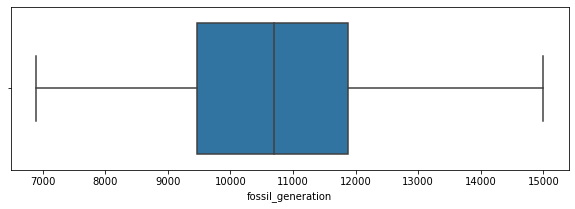

In [32]:
plt.figure(figsize=(10,3))
sns.boxplot(data=data_month, x='fossil_generation');

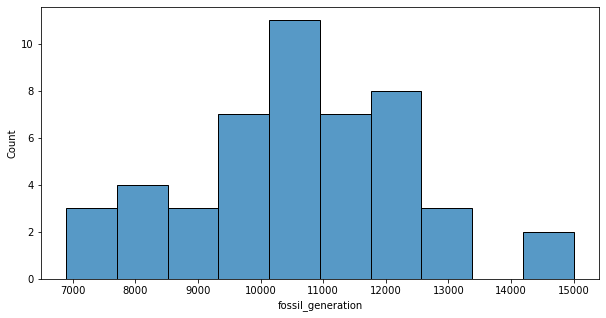

In [33]:
plt.figure(figsize=(10,5))
sns.histplot(data=data_month, x='fossil_generation', bins=10);

For the fossil energy production, the distribution is close fo *normal* with no outliers.

A first comment is that we will keep using the boxplot and the histogram for all the features. To make it easier, let's create a function to help us.

In [34]:
def hist_box(data, feature, figsize=(12, 7)):

    # Subplot canvas
    fig, (ax_box, ax_hist) = plt.subplots(nrows=2, sharex=True,
                                          gridspec_kw={"height_ratios": (0.25, 0.75)}, figsize=figsize)

    # Boxplot on top
    # boxplot will be created and a triangle will indicate the mean value of the column
    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color="pink")

    # Histogram on bottom
    # histogram will be created
    sns.histplot(data=data, x=feature, ax=ax_hist)

    # Add mean and median to histogram
    ax_hist.axvline(data[feature].mean(), color="green")  # mean
    ax_hist.axvline(data[feature].median(), color="orange")  # median

    # Title
    fig.suptitle("Distribution of " + feature, fontsize=16)


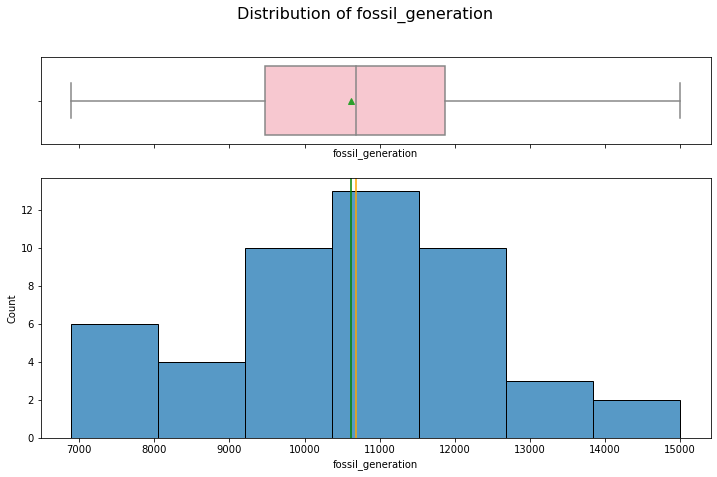

In [35]:
hist_box(data_month, "fossil_generation")


We can confirm that the mean (green) and and median (orange) are close to each other.

### Renewable Energy

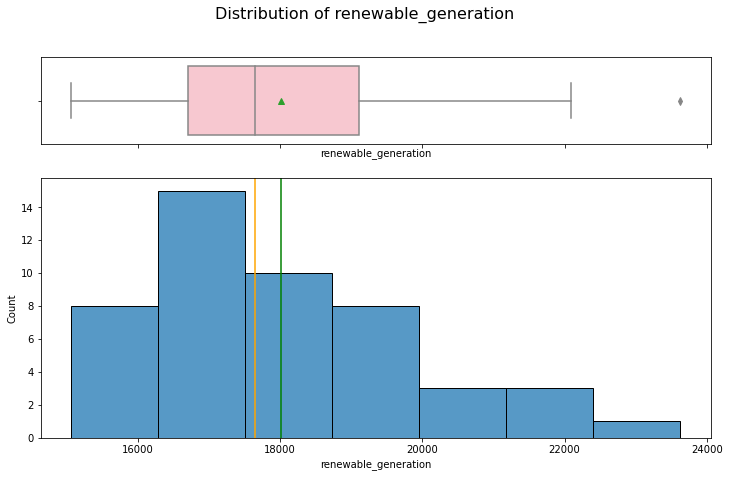

In [36]:
hist_box(data_month, "renewable_generation")

The distribution is right skewed with outliers.

In [37]:
# Filtering data for outlier
data_month[data_month["renewable_generation"] > 23000]


,year,month,total load actual,price day ahead,price actual,fossil_generation,renewable_generation,total_generation,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
43,2018,March,29434.467742,44.802433,48.260013,7502.173387,23622.677419,31124.850806,284.202454,283.313167,285.14394,1007.586145,68.337927,4.126827,209.786258,0.120227,0.000018,0.0,33.891644


March 2018 is shown as an outlier, with a higher average renewable energy generation.

### Total Energy

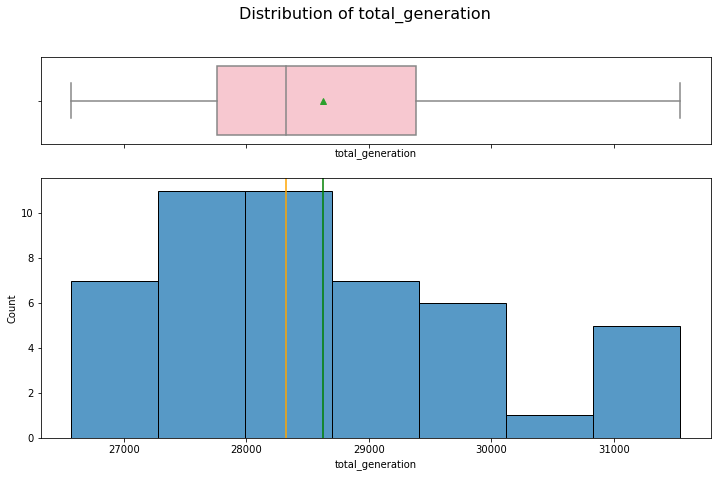

In [38]:
hist_box(data_month, "total_generation")

The distribution is right skewed with no outliers.

### Total Load

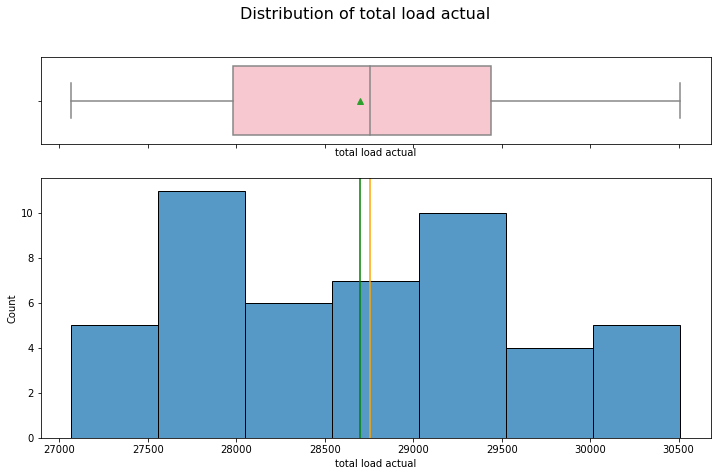

In [39]:
hist_box(data_month, "total load actual")


The total usage of all types of energy has a symmetric distribution.

### Temperature

#### Temp

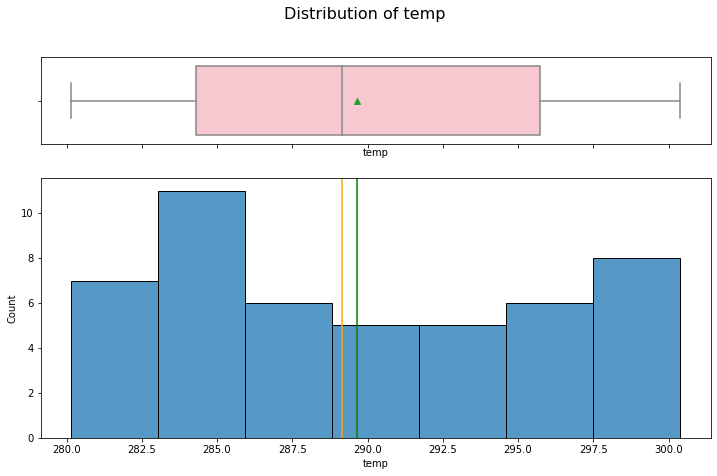

In [40]:
hist_box(data_month, "temp")

Temperature seems to be bi-modal (two peaks). Probably Summer and Winter effects.

#### Min and max temperatures

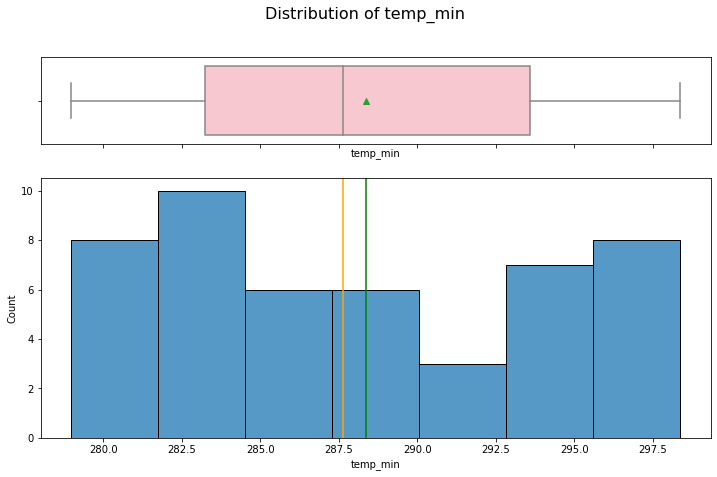

In [41]:
hist_box(data_month, "temp_min")

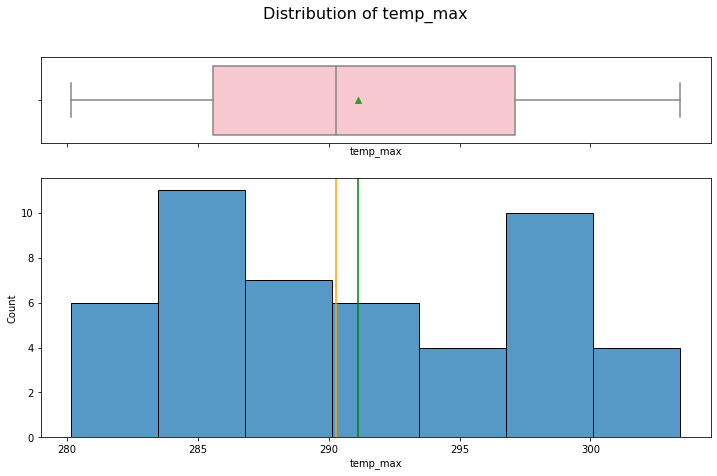

In [42]:
hist_box(data_month, "temp_max")

Same observation as *temp*.

### Pressure

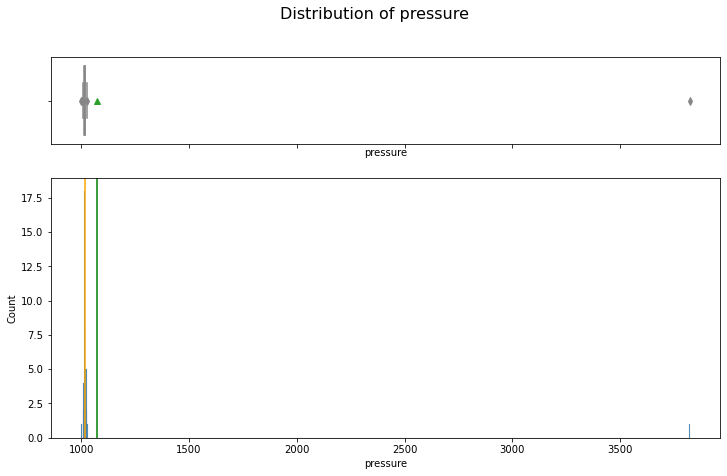

In [43]:
hist_box(data_month, "pressure")

Pressure has a huge outlier. Let's look at it closer.

In [44]:
data_month[data_month['pressure'] > 1500]

,year,month,total load actual,price day ahead,price actual,fossil_generation,renewable_generation,total_generation,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
3,2015,February,29478.727685,44.206295,56.412991,9355.761905,22093.27381,31449.035714,281.200904,281.145523,281.275672,3822.709524,71.226786,3.528274,208.15506,0.233661,0.0,0.215982,38.5


February 2015 is the outlier for pressure, with an average pressure more than 3 times larger than any other month, pointing to something wrong. We can't check which day, but we can replace the value with the average for the month of February:

In [45]:
data_month.loc[3, 'pressure'] = data_month[(data_month['month'] == 'February') & (data_month['year'] != 2015)]['pressure'].mean()

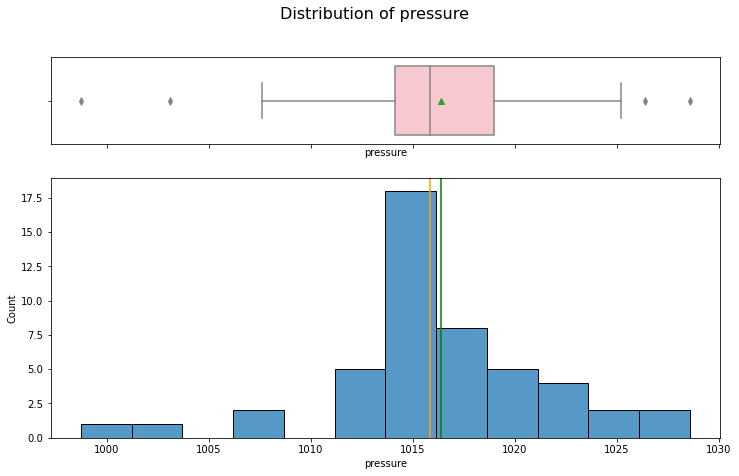

In [46]:
hist_box(data_month, "pressure")


The distribution for the pressure is right skewed with outliers that are now, apparently, possible to happen.

### Humidity

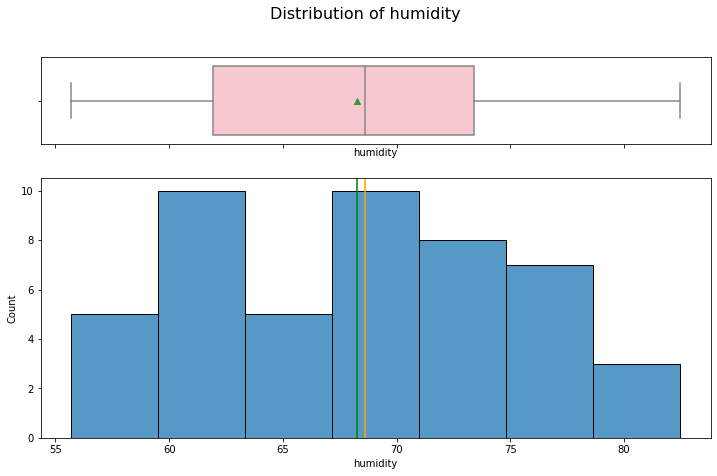

In [47]:
hist_box(data_month, "humidity")

Humidity has a symmetric distribution with no outliers.

### Wind

#### Wind Speed

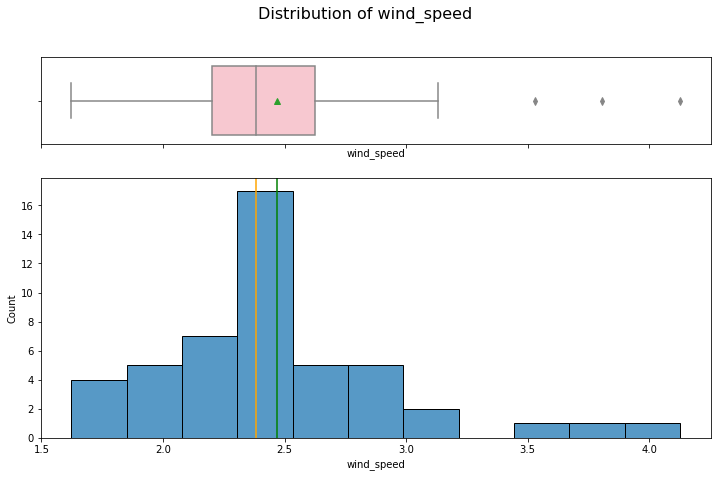

In [48]:
hist_box(data_month, "wind_speed")

A right skewed distribution with outliers over 3.2.

In [49]:
data_month[data_month["wind_speed"] > 3.2]

,year,month,total load actual,price day ahead,price actual,fossil_generation,renewable_generation,total_generation,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
3,2015,February,29478.727685,44.206295,56.412991,9355.761905,22093.273810,31449.035714,281.200904,281.145523,281.275672,1015.109317,71.226786,3.528274,208.155060,0.233661,0.000000,0.215982,38.500000
15,2016,February,29274.227011,31.431897,36.732601,7968.311782,21615.405172,29583.716954,283.927434,282.761944,285.371025,1018.282916,70.140852,3.804098,205.579687,0.067562,0.000309,0.000779,29.264915
43,2018,March,29434.467742,44.802433,48.260013,7502.173387,23622.677419,31124.850806,284.202454,283.313167,285.143940,1007.586145,68.337927,4.126827,209.786258,0.120227,0.000018,0.000000,33.891644


These outliers are from months with higher production on renewable energy, probably driven by the wind power.

#### Wind Direction

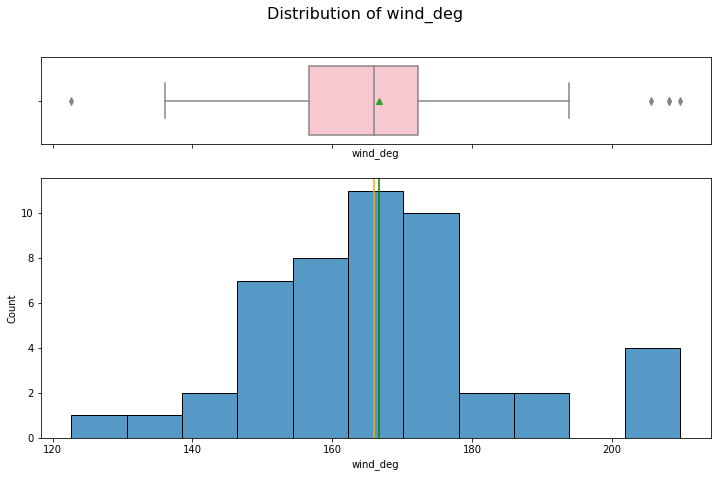

In [50]:
hist_box(data_month, "wind_deg")

Wind direction has a close to normal distribution with outliers.

In [51]:
data_month[data_month["wind_deg"] > 190]

,year,month,total load actual,price day ahead,price actual,fossil_generation,renewable_generation,total_generation,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
3,2015,February,29478.727685,44.206295,56.412991,9355.761905,22093.273810,31449.035714,281.200904,281.145523,281.275672,1015.109317,71.226786,3.528274,208.155060,0.233661,0.000000,0.215982,38.500000
4,2015,January,29997.428765,47.419395,64.898763,10975.498656,20265.599462,31241.098118,280.161853,280.161853,280.161853,1011.519848,74.269220,2.773566,208.266711,0.140726,0.000242,0.019456,26.796057
15,2016,February,29274.227011,31.431897,36.732601,7968.311782,21615.405172,29583.716954,283.927434,282.761944,285.371025,1018.282916,70.140852,3.804098,205.579687,0.067562,0.000309,0.000779,29.264915
16,2016,January,29309.133065,41.462016,45.562594,10227.041667,19091.509409,29318.551075,284.129075,282.928775,285.545507,1020.828479,75.343255,3.129423,190.388003,0.053508,0.000800,0.000000,33.686744
19,2016,March,28014.223118,33.255121,36.806882,7784.805108,20797.026882,28581.831989,284.688246,283.555722,286.258105,1015.590751,67.571646,2.923739,193.838191,0.060453,0.000460,0.000429,27.978136
43,2018,March,29434.467742,44.802433,48.260013,7502.173387,23622.677419,31124.850806,284.202454,283.313167,285.143940,1007.586145,68.337927,4.126827,209.786258,0.120227,0.000018,0.000000,33.891644


In [52]:
data_month[data_month["wind_deg"] < 130]

,year,month,total load actual,price day ahead,price actual,fossil_generation,renewable_generation,total_generation,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
14,2016,December,28935.895161,52.637527,67.601304,12118.568548,16562.985215,28681.553763,283.366049,281.471074,285.822994,1026.353176,82.455741,1.809381,122.671013,0.047861,0.0,0.0,27.027717


Wind direction seems to have correlation with the renewable energy production, as higher angles suggest higher production.

### Rain

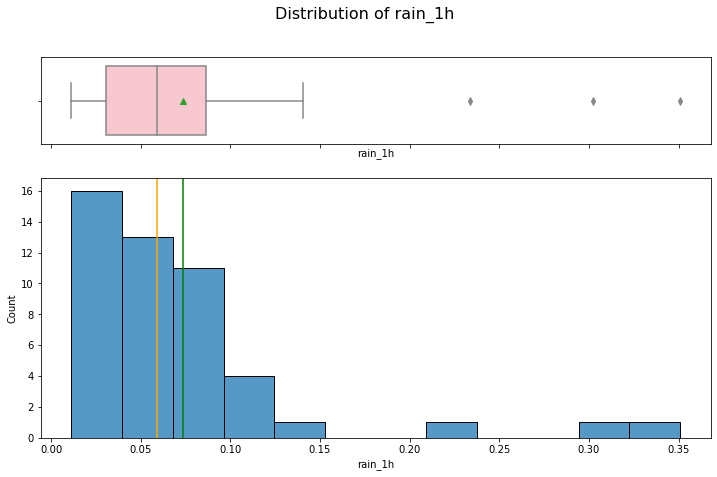

In [53]:
hist_box(data_month, 'rain_1h')

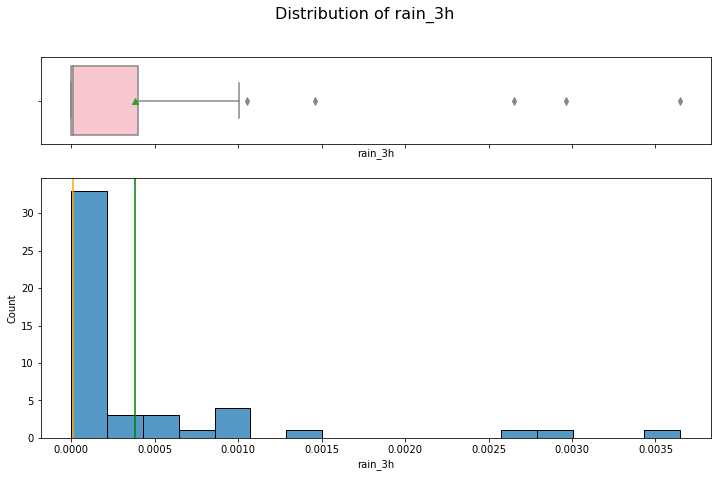

In [54]:
hist_box(data_month, 'rain_3h')

Both distributions are right skewed and contain outliers.

### Snow

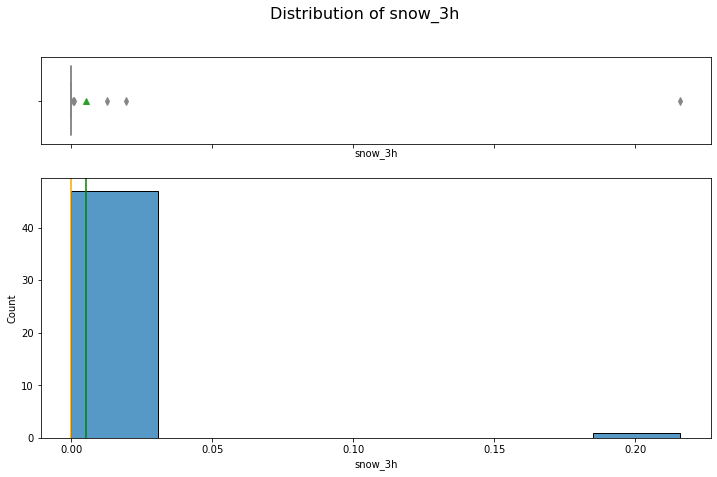

In [55]:
hist_box(data_month, 'snow_3h')

For most of the days, the quantity of snowfall is zero.

### Clouds

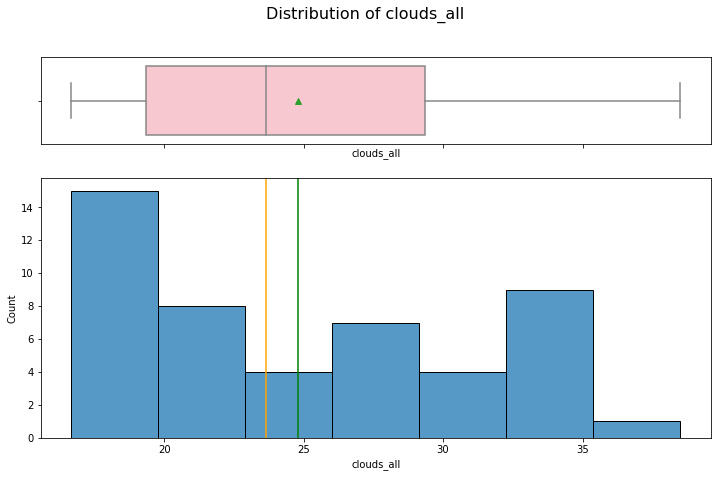

In [56]:
hist_box(data_month, 'clouds_all')

It is a right skewed distribution without outliers.

### Energy Price

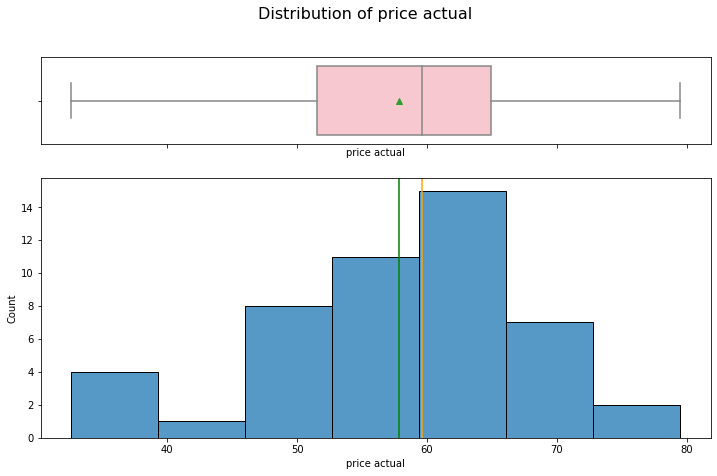

In [57]:
hist_box(data_month, 'price actual')

The price of the energy is left skewed with no outliers.

## Pairs Plot

Let's quickly check the scatter plot of the features with each other using the `pairplot`.

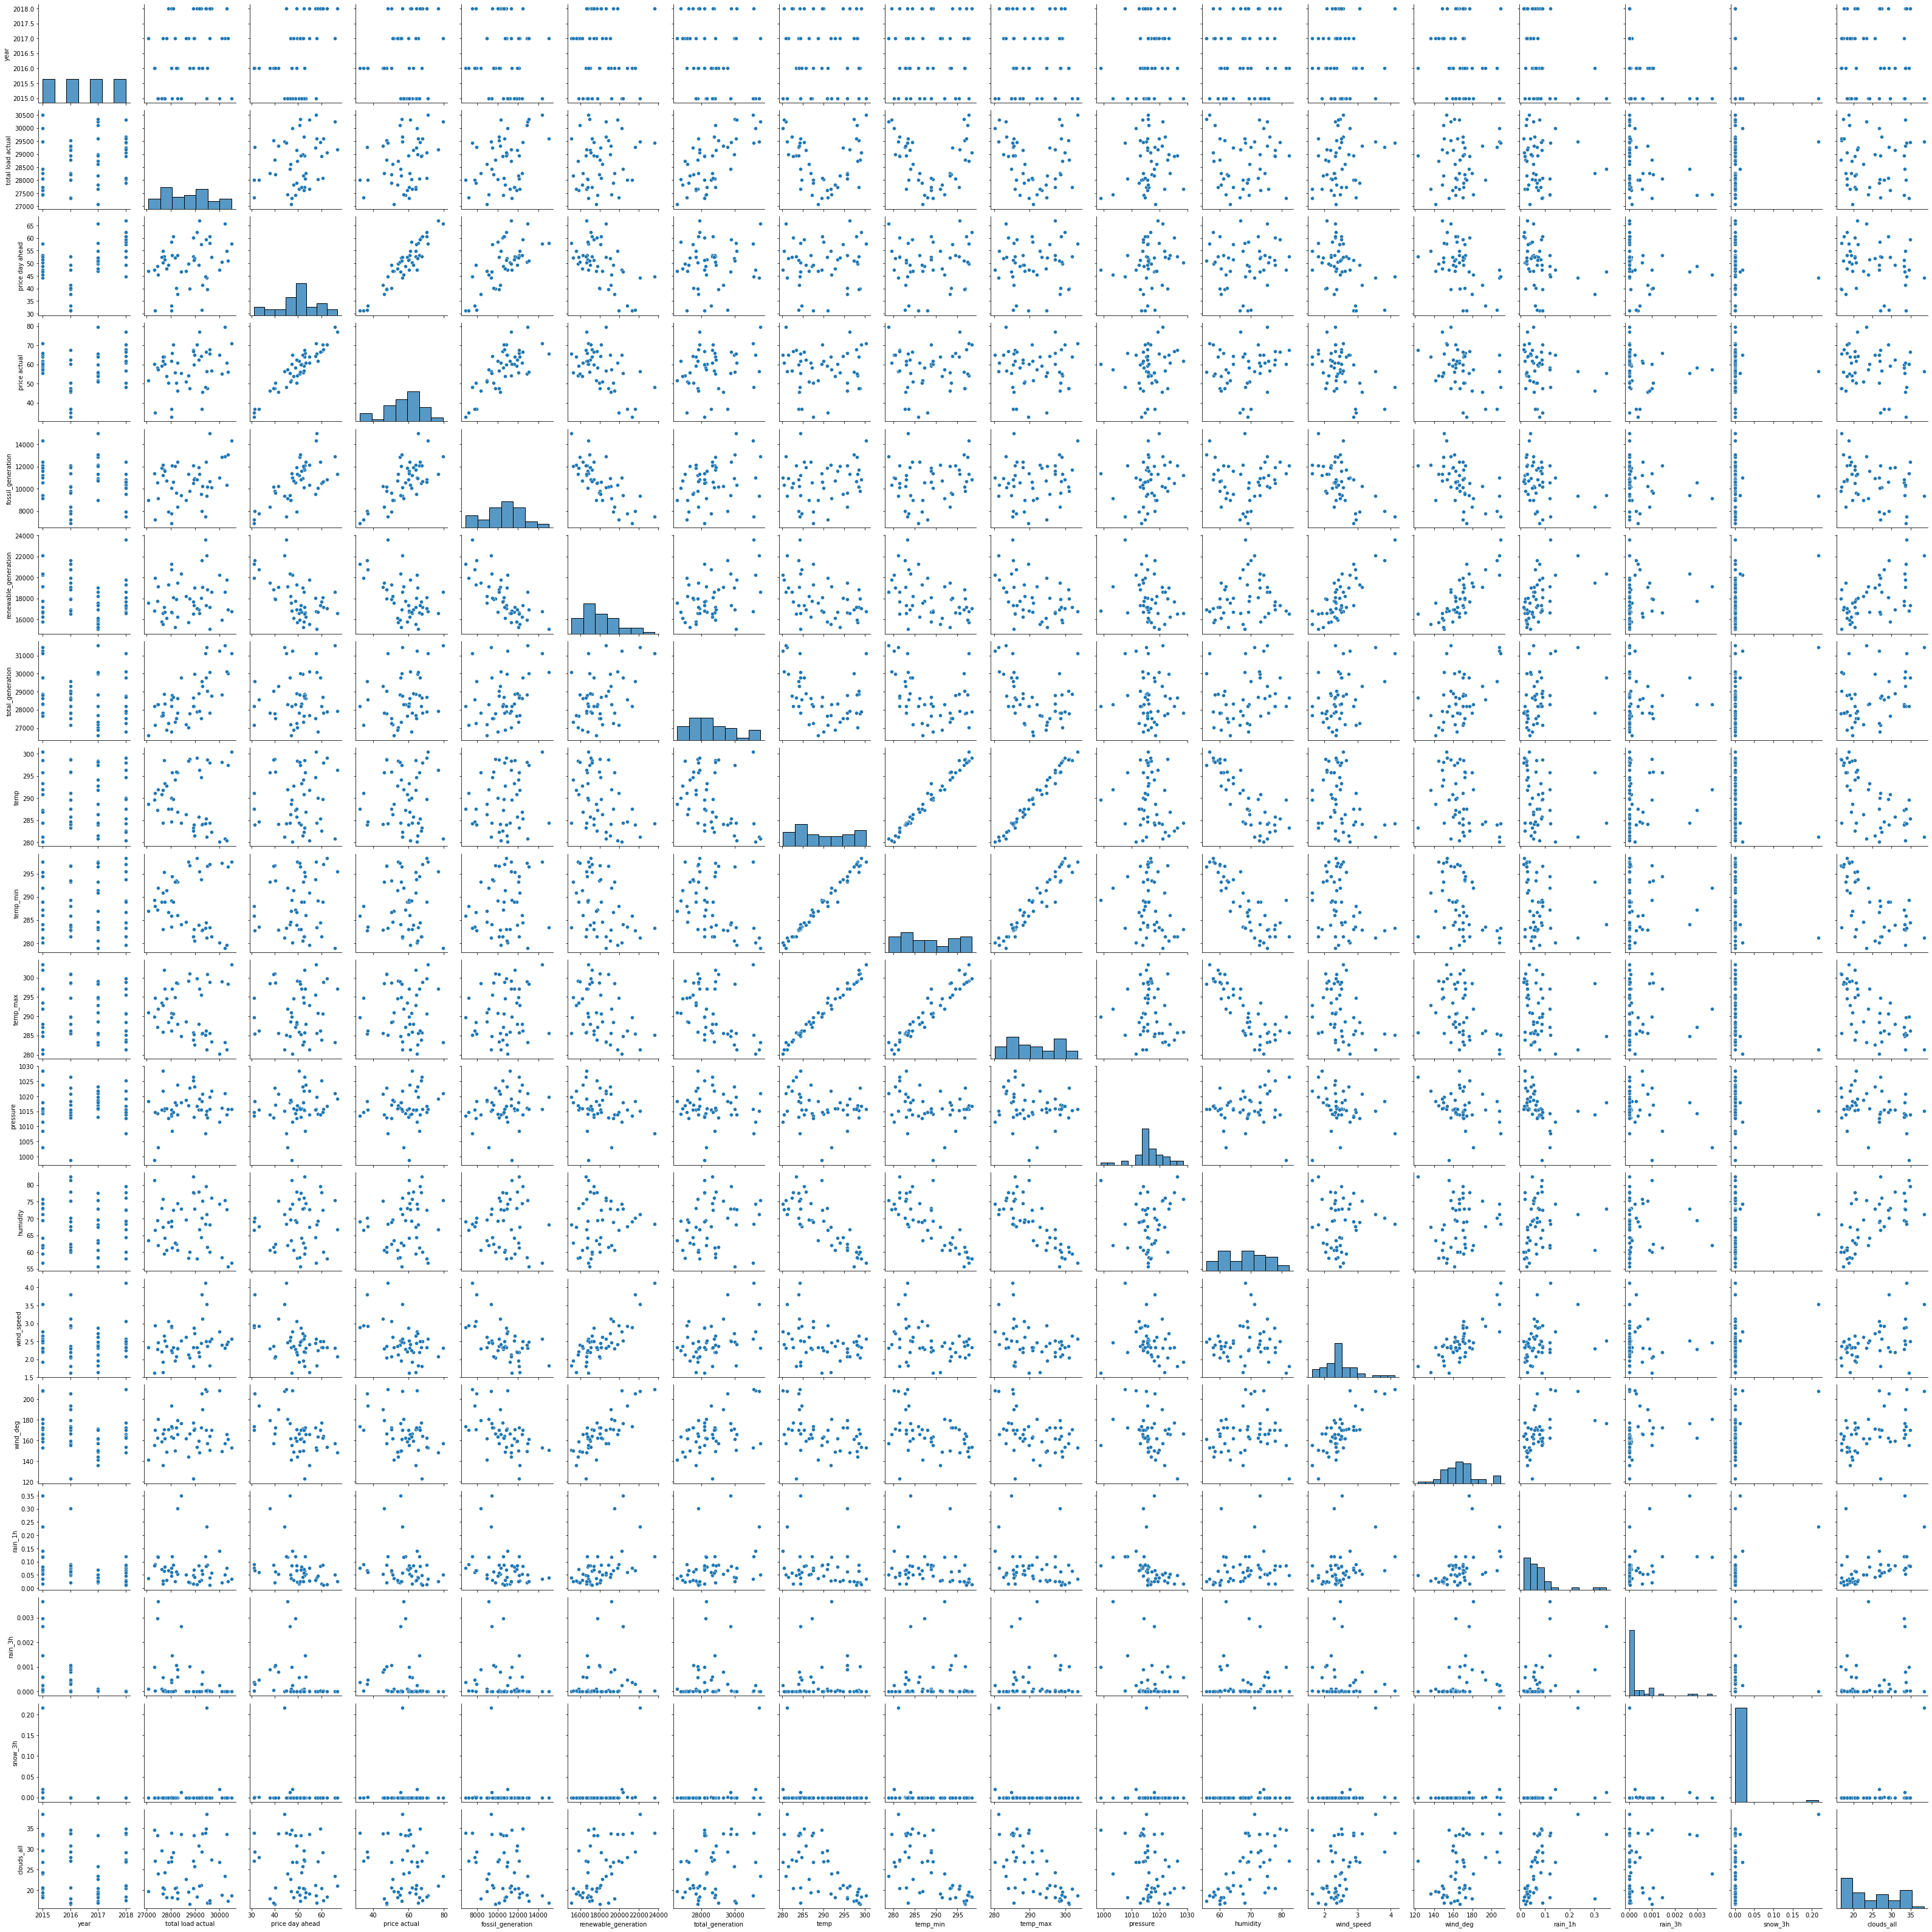

In [59]:
sns.pairplot(data_month);

* Temperature features are highly related to each other.
* Humidity seems to have significant correlation with temperature.
* Wind speed and direction seem to influence the renewable energy production.

In [60]:
# Converting columns year and month to categorical
data_month["month"] = data_month["month"].astype('category')
data_month["year"] = data_month["year"].astype('category')

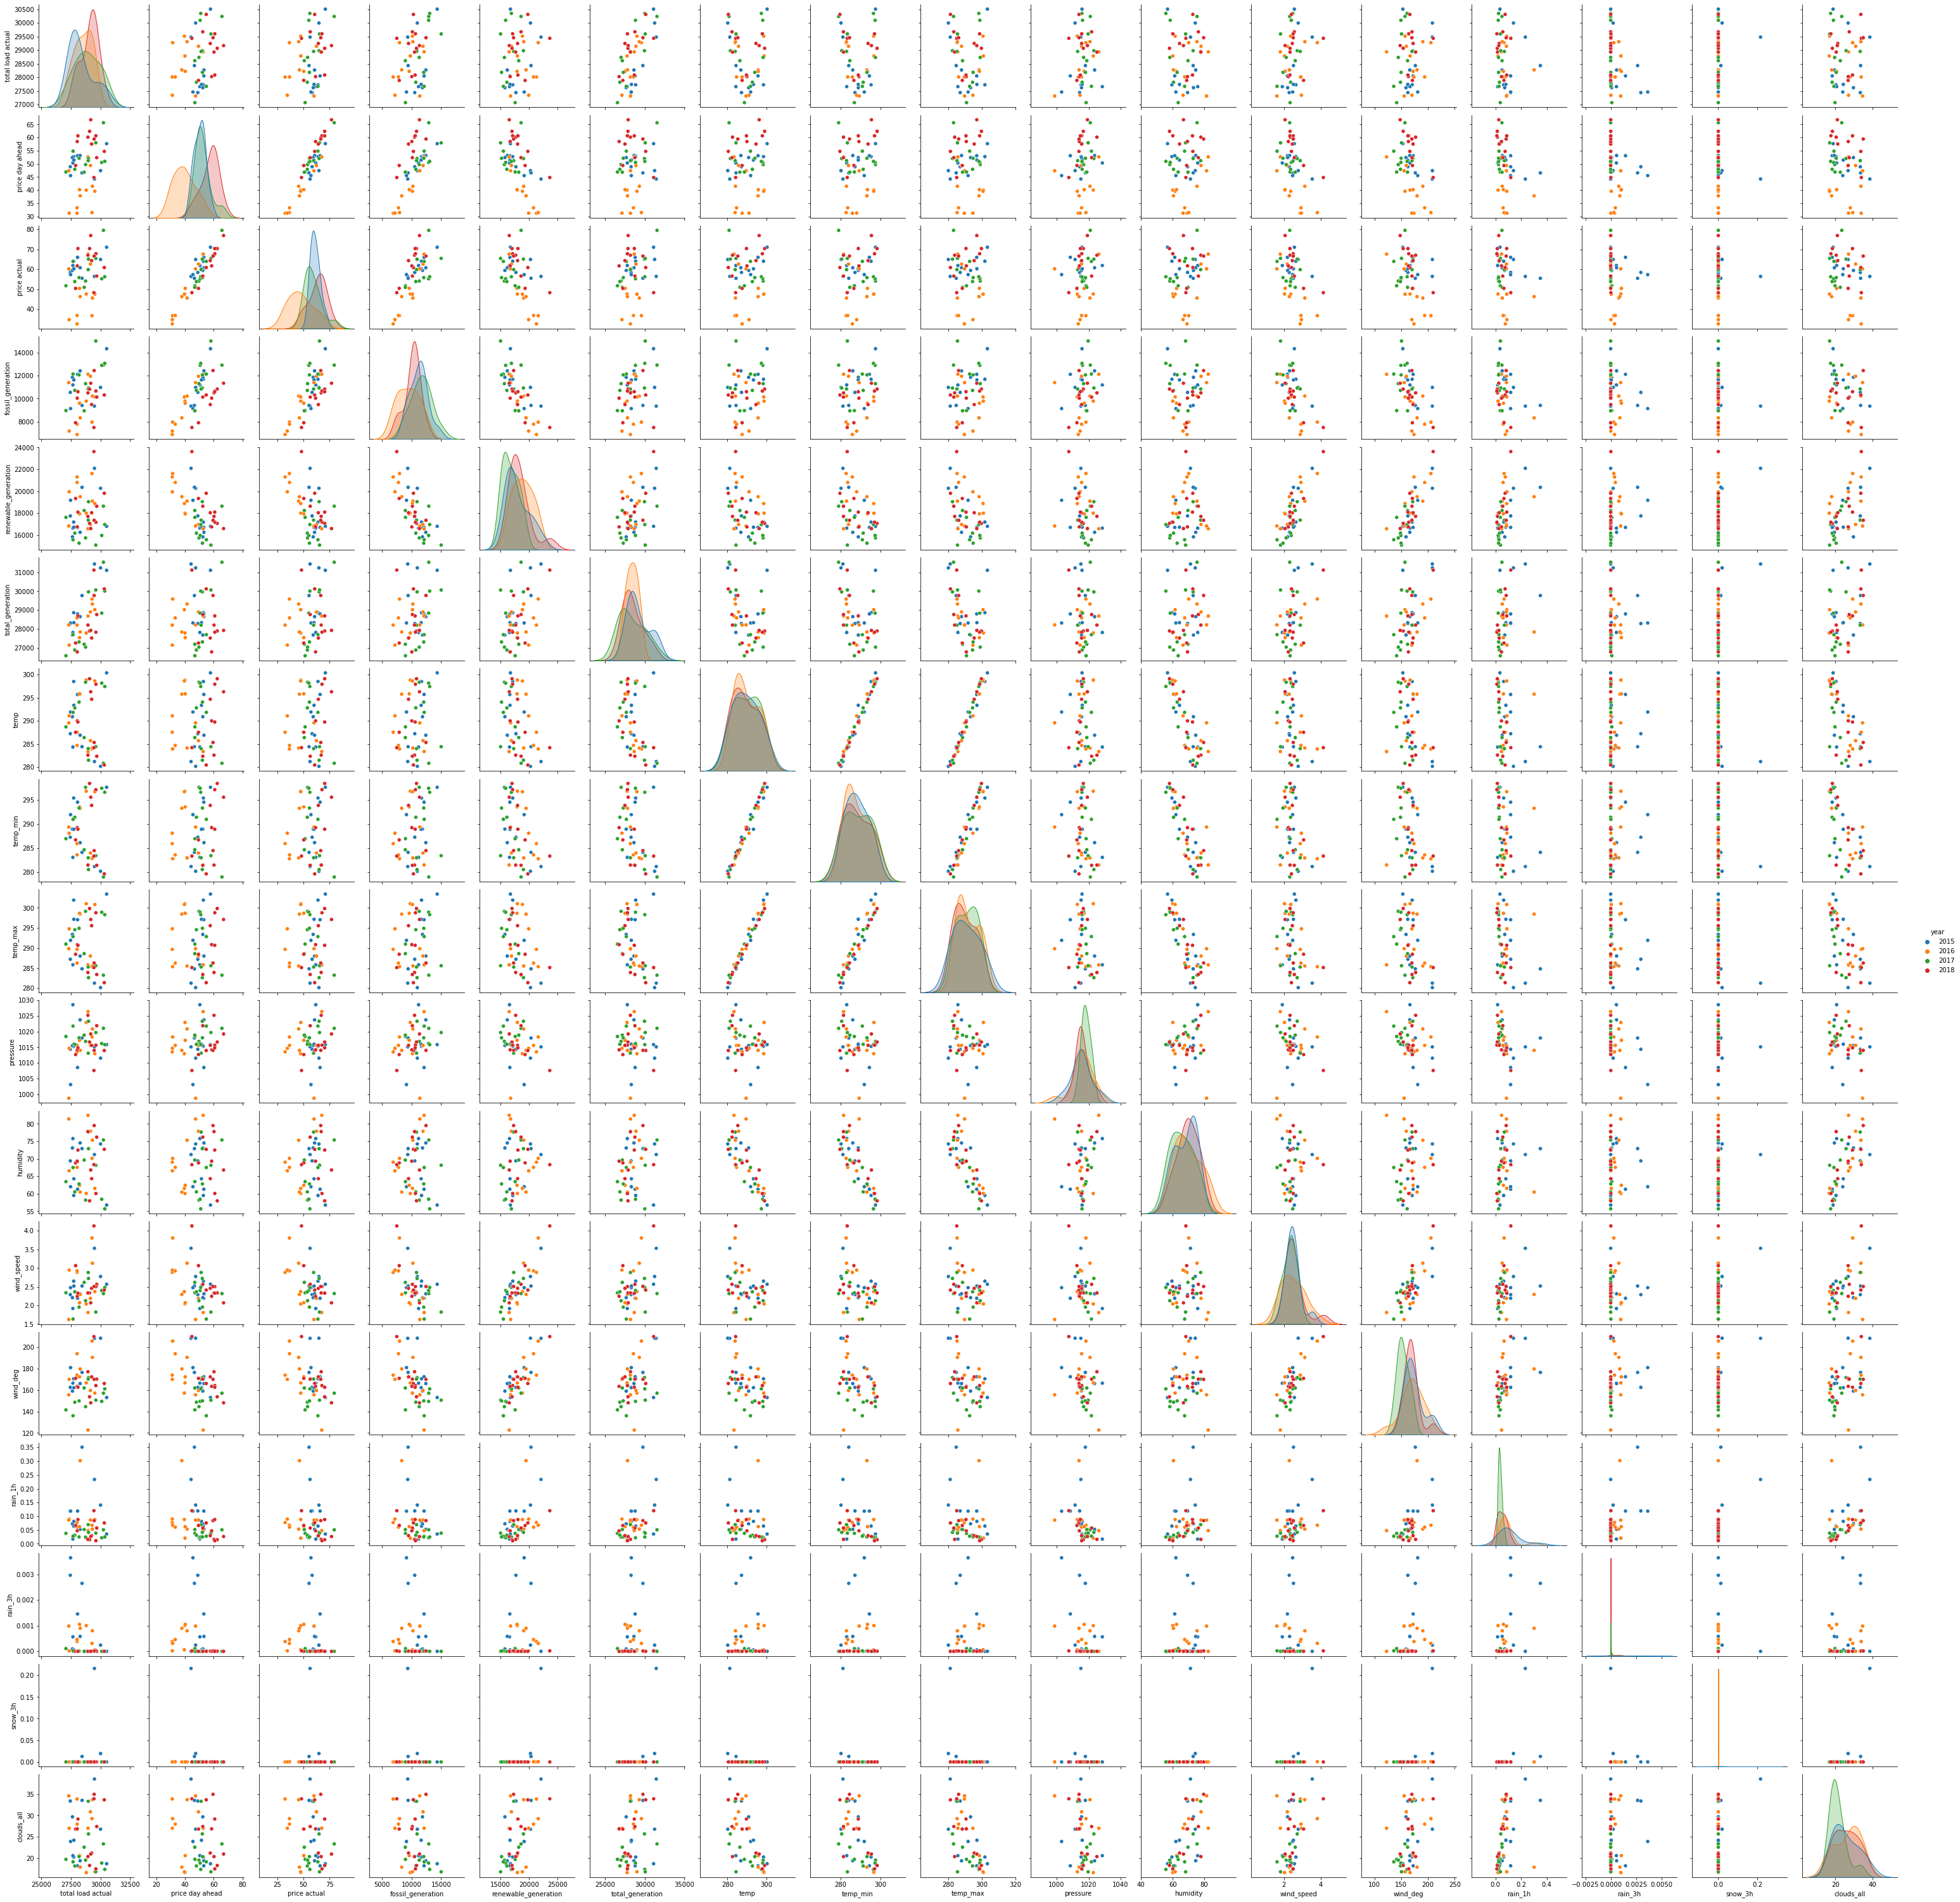

In [62]:
sns.pairplot(data_month, hue="year");

Price, load, and energy generation changes over the years.

## Energy Generation in Time

### Energy data

We can visualize energy generation, load, and price over the years.

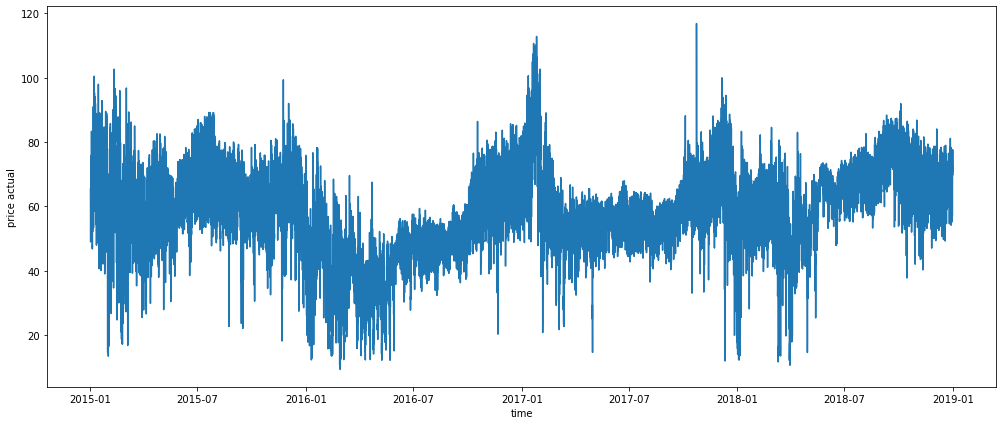

In [69]:
plt.figure(figsize=(17, 7))
sns.lineplot(data=data, x="time", y="price actual");

In [73]:
data[data['price actual'] == data['price actual'].max()]

,time,total load actual,price day ahead,price actual,fossil_generation,renewable_generation,total_generation,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,year,month
24642,2017-10-23 17:00:00+00:00,31103.0,71.42,116.8,18599.0,13686.0,32285.0,295.064,294.55,295.55,1023.4,47.0,2.6,123.0,0.0,0.0,0.0,0.0,2017,October


We can see how the price of energy has changed in the dataset, with a higher peak in October 23th 2017, and a low period from January to June 2016.

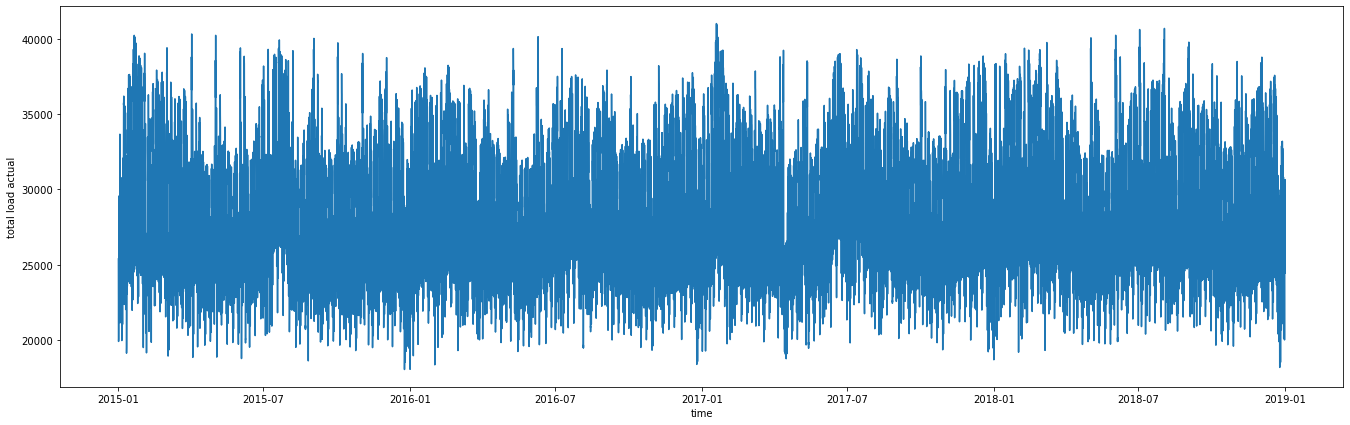

In [76]:
plt.figure(figsize=(23, 7))
sns.lineplot(data=energy, x="time", y="total load actual");

The total load has a fairly high range (20000 to 40000), but is relatively steady over the years.

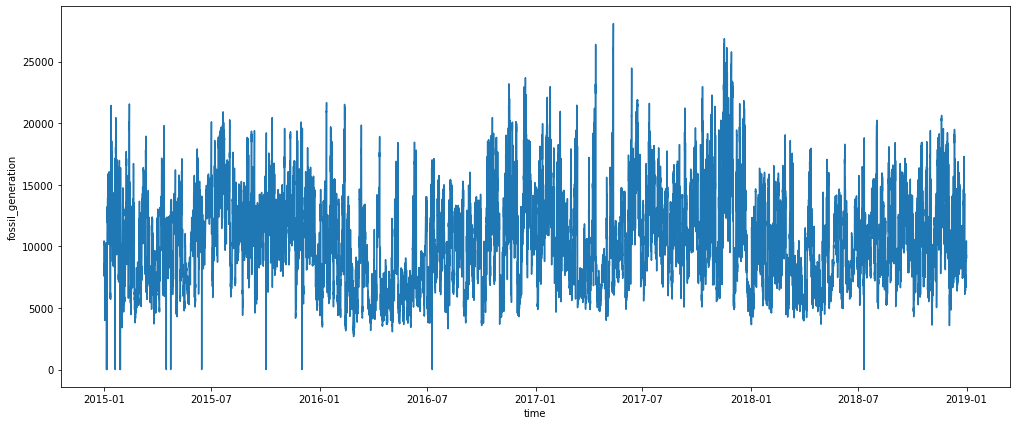

In [78]:
plt.figure(figsize=(17, 7))
sns.lineplot(data=energy, x="time", y="fossil_generation");

Energy from fossil sources has kept relatively steady over time.

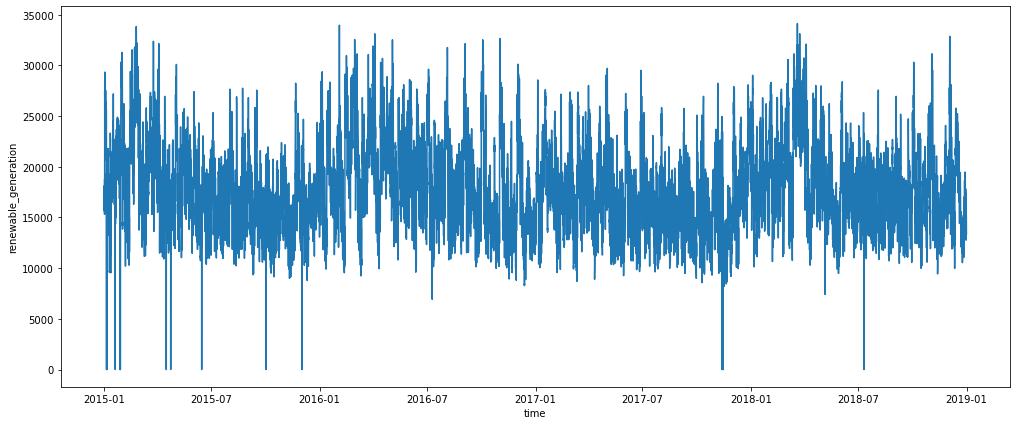

In [82]:
plt.figure(figsize = (17, 7))
sns.lineplot(data = energy, x = "time", y = "renewable_generation");

Same for the renewable energy.

Let's now check the production, load, and price average per month and per year.

#### Price

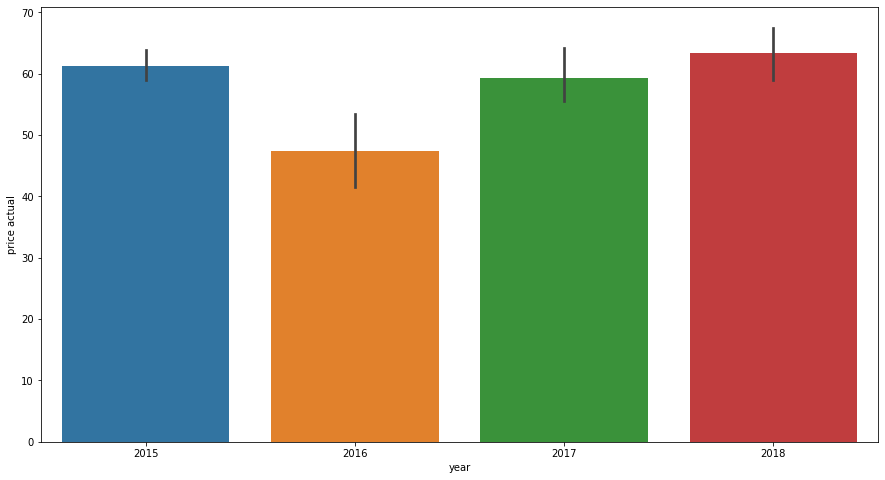

In [84]:
plt.figure(figsize = (15,8))
sns.barplot(data = data_month, x = "year", y = "price actual");

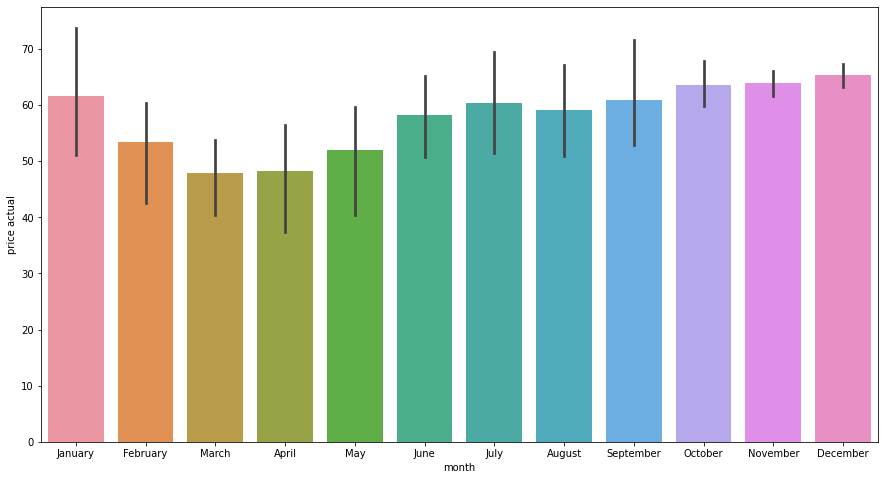

In [88]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize = (15,8))
sns.barplot(data = data_month, x = "month", y = "price actual", order = months);

Price suffered a considerable drop in 2016, but has maintaining the same price over the years. And prices are lower by the end of Winter and during the Spring.

#### Load

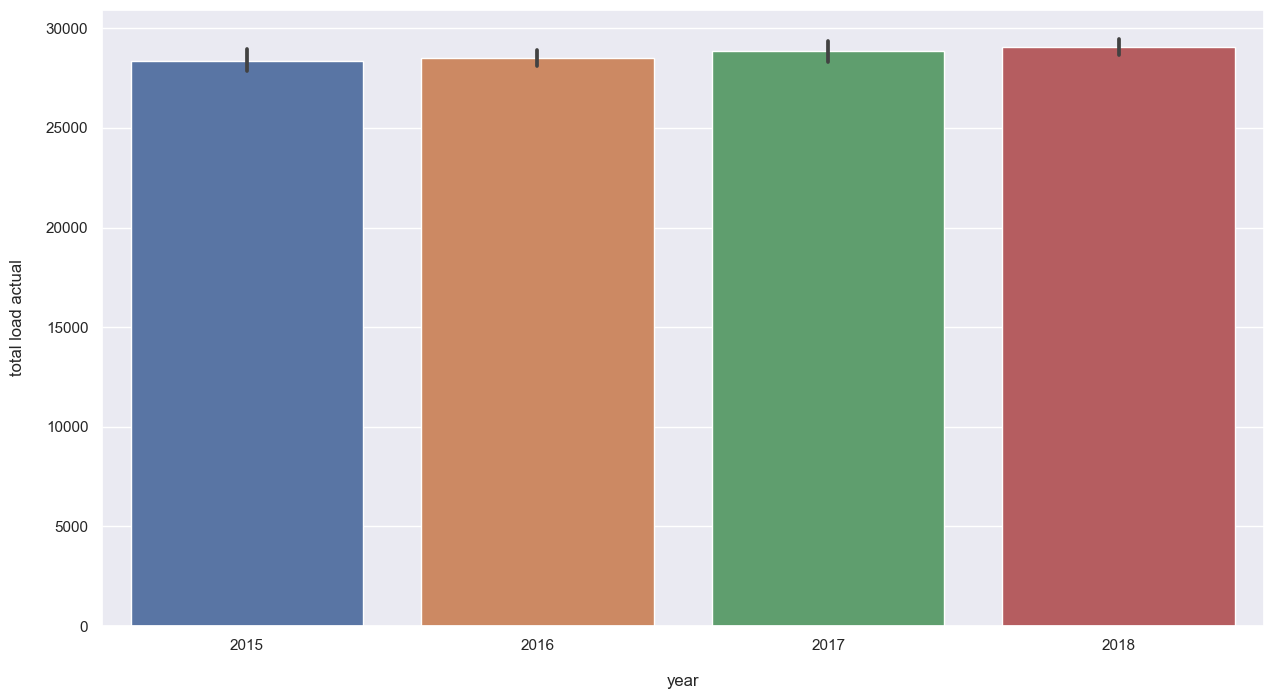

In [127]:
plt.figure(figsize = (15,8))
sns.barplot(data = data_month, x = "year", y = "total load actual");

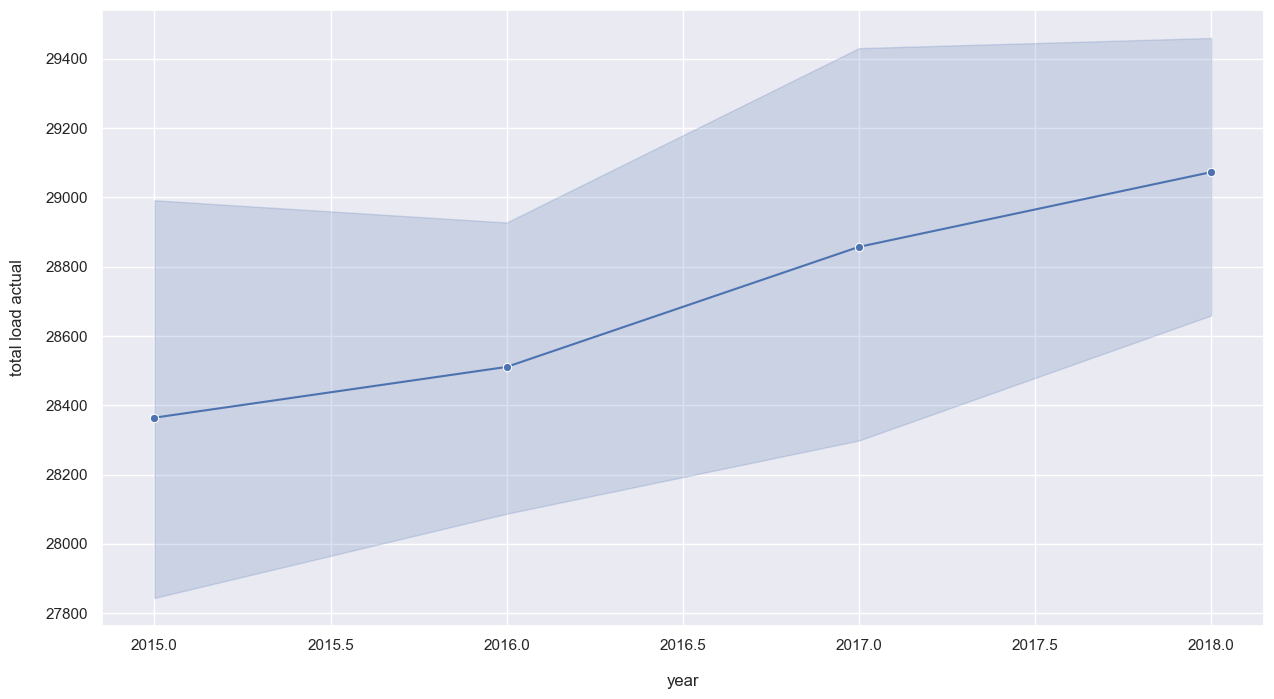

In [128]:
sns.lineplot(data = data_month, x='year', y='total load actual', marker='o');

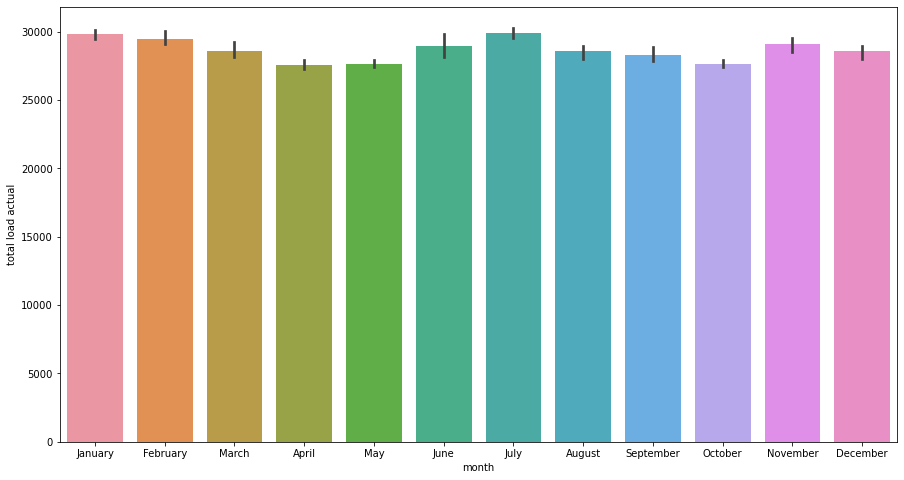

In [92]:
plt.figure(figsize=(15, 8))
sns.barplot(data=data_month, x="month", y="total load actual", order=months)


Demand for energy is slightly increasing over the years. As per months, end of Winter and Spring are the periods with lower demand of energy, which may explain the lower price during that time of the year.

#### Fossil Generation

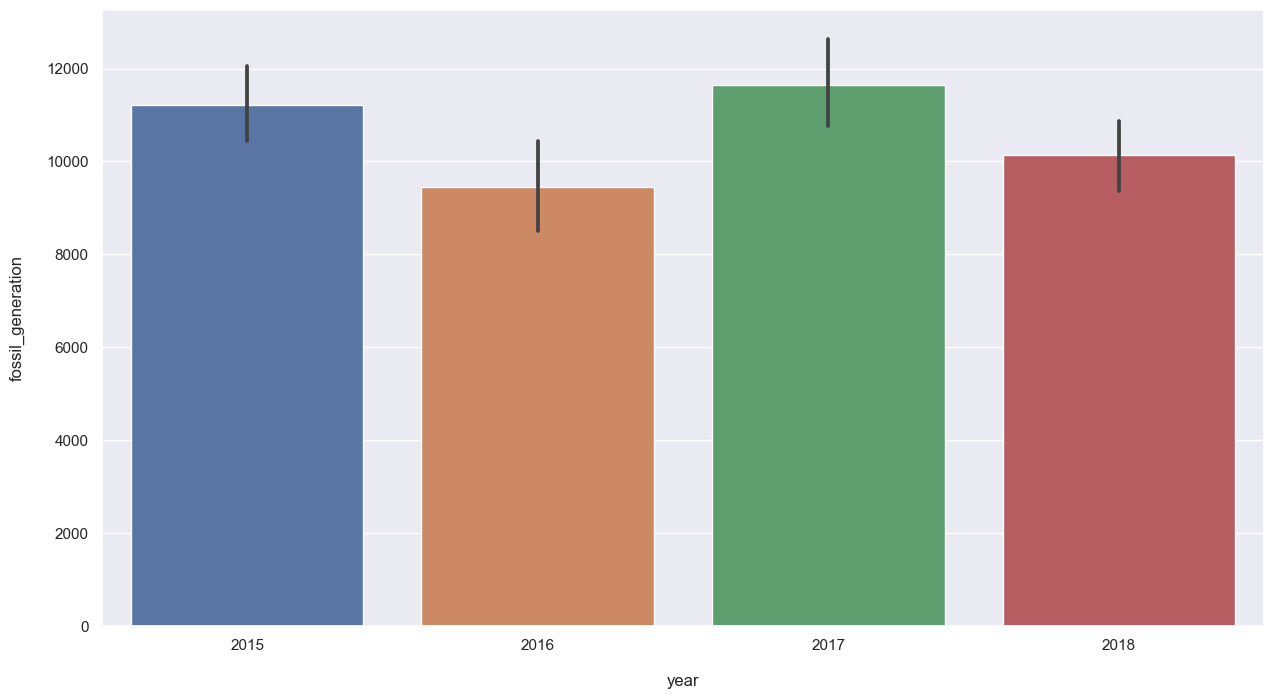

In [130]:
plt.figure(figsize=(15, 8))
sns.barplot(data=data_month, x="year", y="fossil_generation");

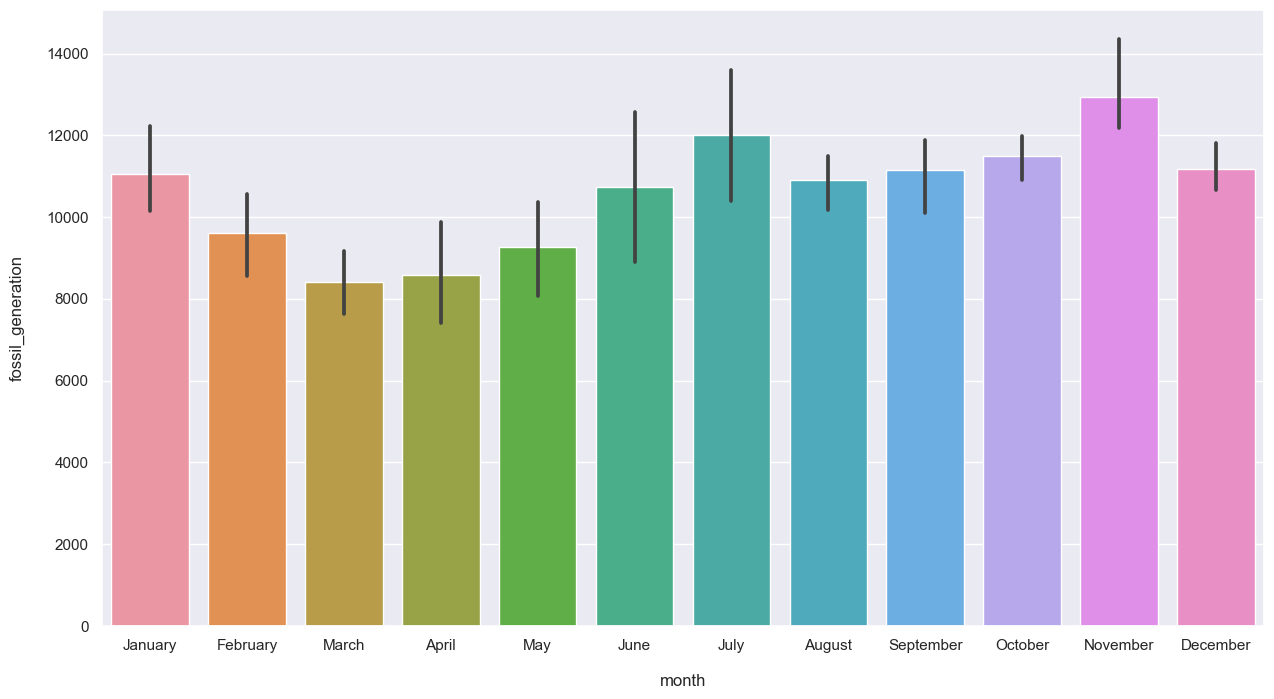

In [131]:
plt.figure(figsize=(15, 8))
sns.barplot(data=data_month, x="month", y="fossil_generation", order=months);

Fossil generation has fluctuated over the years, and follow the same trend as price and load for the months.

#### Renewable Generation

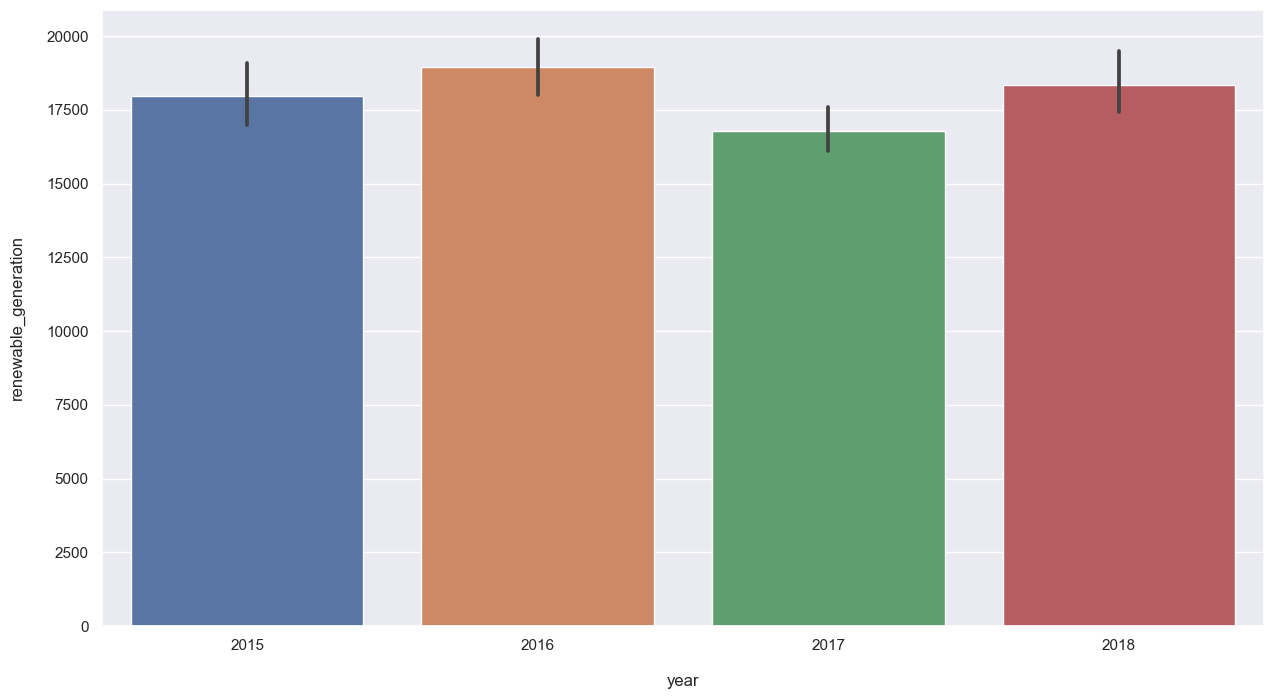

In [135]:
plt.figure(figsize=(15, 8))
sns.barplot(data=data_month, x="year", y="renewable_generation");

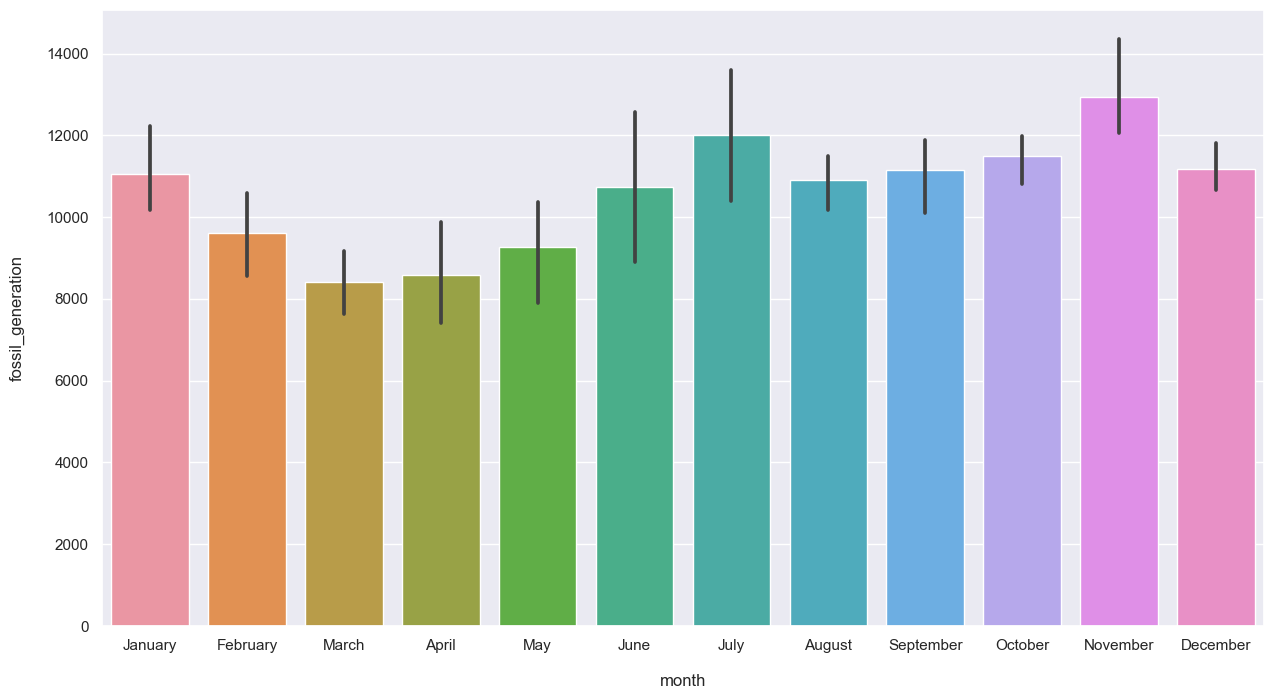

In [136]:
plt.figure(figsize = (15,8))
sns.barplot(data = data_month, x = "month", y = "fossil_generation", order = months);

Same trend as per the fossil generation.

# Summary

Insights from the analysis:

1. There is a correlation between wind speed and direction with renewable energy generation
2. We could find an outlier (pressure) that might be an error, and we replaced it by the average of the months from others years
3. Energy demand, price, and production follow the same trend over the months, with lower valuer by the end of Winter and during Spring
4. Energy demand haven't changed much over the years
5. Generation, for both fossil and renewable, fluctuate over the year
6. Price had a signifcant drop in 2016, and it requires further research to learn the reason.